# <center> Week - 7 & 8 Exercises

<center> DSC-540

<center> Kalyan Pothineni

### Connect to an API and do a data pull - OpenweatherAPI

In [108]:
# Import the Libraries as needed
import requests
import json

In [109]:
# Load the API key from the JSON file
with open('kalyanpothineni_OPENWEATHER_apikey.json') as f:
    api_keys = json.load(f)
    API_KEY = api_keys['OWapi']

In [110]:
# Define OpenWeatherMap API key and base URL
BASE_URL = "http://api.openweathermap.org/data/2.5/"
# special character used to represent degrees of temperature
DEGREE_SYMBOL = "\u00b0"

In [111]:
# Function to convert temperature from Kelvin to Celsius

def kelvin_to_celsius(temp_kelvin):
    return temp_kelvin - 273.15

In [112]:
# Function to convert temperature from Kelvin to Fahrenheit

def kelvin_to_fahrenheit(temp_kelvin):
    return (temp_kelvin - 273.15) * 9/5 + 32

In [113]:
# Function to get weather data for a given location by ZIPCODE

def get_weather_by_zip(zip_code, unit):
    try:
        geo_url = f"{BASE_URL}weather?zip={zip_code},&appid={API_KEY}"
        geo_response = requests.get(geo_url)
        geo_data = geo_response.json()

        if geo_response.status_code == 200:
            lat = geo_data["coord"]["lat"]
            lon = geo_data["coord"]["lon"]
            weather_url = f"{BASE_URL}weather?lat={lat}&lon={lon}&appid={API_KEY}"
            weather_response = requests.get(weather_url)
            weather_data = weather_response.json()

            if weather_response.status_code == 200:
                display_weather_data(weather_data, unit)
            else:
                print("Failed to retrieve weather data.")
        else:
            print("Invalid zip code. Please try again.")
    except requests.exceptions.RequestException as e:
        print("Connection error:", str(e))
        return None

In [114]:
# Function to get weather data for a given location by City and state
def get_weather_by_city(city, state, unit):
    try:
        geo_url = f"{BASE_URL}weather?q={city},{state},US,&appid={API_KEY}"
        geo_response = requests.get(geo_url)
        geo_data = geo_response.json()

        if geo_response.status_code == 200:
            lat = geo_data["coord"]["lat"]
            lon = geo_data["coord"]["lon"]

            weather_url = f"{BASE_URL}weather?lat={lat}&lon={lon}&appid={API_KEY}&units={unit}"
            weather_response = requests.get(weather_url)
            weather_data = weather_response.json()

            if weather_response.status_code == 200:
                display_weather_data(weather_data, unit)
            else:
                print("Failed to retrieve weather data.")
        else:
            print("Invalid city or state. Please check and correct city name or"
                  " state (State name should be in full) .")
    except requests.exceptions.RequestException as e:
        print("Connection error:", str(e))
        return None

In [115]:
# Function to display weather data in a readable/printable format
# Parse the json
# Convert the temperatures

def display_weather_data(weather_data, unit):
    city = str(json.dumps(weather_data['name'])).replace('"', '')
    country = str(json.dumps(weather_data['sys']['country'])).replace('"', '')
    desc = str(json.dumps(weather_data['weather'][0]['description'])).\
        replace('"', '').title()
    temp = float(json.dumps(weather_data['main']['temp']))
    real_feel = float(json.dumps(weather_data['main']['feels_like']))
    pressure = float(json.dumps(weather_data['main']['pressure']))
    humidity = float(json.dumps(weather_data['main']['humidity']))
    speed = float(json.dumps(weather_data['wind']['speed']))

    if unit == "C":
        temperature = kelvin_to_celsius(temp)
        feels_like = kelvin_to_celsius(real_feel)
        temperature_unit = "°C"
    elif unit == "F":
        temperature = kelvin_to_fahrenheit(temp)
        feels_like = kelvin_to_fahrenheit(real_feel)
        temperature_unit = "°F"
    else:
        temperature = temp
        feels_like = real_feel
        temperature_unit = "K"

    print(f"{'':-<40}\n"
          f'Weather Report for {city}, {country}:\n'
          f'\tCurrent Temperature: {round(temperature,2)},'
          f' {temperature_unit}\n'
          f'\tFeels Like: {round(feels_like,2)},{temperature_unit}\n'
          f'\tCurrent Conditions: {desc}\n'
          f'\tAtmospheric Pressure: {pressure} hPa\n'
          f'\tHumidity: {humidity}%\n'
          f'\tWind Speed: {speed}%\n'
          f"{'':-<40}"
          )

In [116]:
# Main Function
def main():
    print("Welcome to the Weather Forecast App!")
    print()

    while True:
        print("Please select an option:")
        print("1. Get weather by ZIP code")
        print("2. Get weather by city and state")
        print("0. Exit")
        choice = input("Enter your choice: ")

        if choice == "1":
            zip_code = input("Enter ZIP code: ")
            unit = input("Enter temperature unit (C/F/K): ").upper()
            get_weather_by_zip(zip_code, unit)
        elif choice == "2":
            city = input("Enter City Name: ").upper()
            state = input("Enter Full State Name (Example: Texas): ").upper()
            unit = input("Enter temperature unit (C/F/K): ").upper()
            get_weather_by_city(city, state, unit)
        elif choice == "0":
            print('Thank you for using Weather Now! Goodbye')
            break
        else:
            print("Invalid choice. Please try again.")
        print()

if __name__ == "__main__":
    main()

Welcome to the Weather Forecast App!

Please select an option:
1. Get weather by ZIP code
2. Get weather by city and state
0. Exit
Enter your choice: 1
Enter ZIP code: 77702
Enter temperature unit (C/F/K): F
----------------------------------------
Weather Report for Beaumont, US:
	Current Temperature: 87.21, °F
	Feels Like: 99.81,°F
	Current Conditions: Clear Sky
	Atmospheric Pressure: 1016.0 hPa
	Humidity: 74.0%
	Wind Speed: 2.06%
----------------------------------------

Please select an option:
1. Get weather by ZIP code
2. Get weather by city and state
0. Exit
Enter your choice: 0
Thank you for using Weather Now! Goodbye


This program will allows the user to input a location and call an API to get lat/long, second api to get the weather by lat/long and gathers data from openweathermap.org and prints weather information in a readable format for said location

### Activity 9  - Extracting the Top 100 ebooks from Gutenberg

In [52]:
# Import the Libraries as needed
import re
import requests
from bs4 import BeautifulSoup
import ssl

In [53]:
# Ignore SSL errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [54]:
# Read the HTML from the URL
url = "https://www.gutenberg.org/browse/scores/top"
response = requests.get(url)
#response

In [55]:
# Write a small function to check the status of the web request
def check_response_status(response):
    if response.status_code == 200:
        return True
    return False

In [56]:
check_response_status(response)

True

In [57]:
# Decode the response and pass it on to BeautifulSoup for HTML parsing
html_content = response.content
soup = BeautifulSoup(html_content, "html.parser")

In [58]:
# Find all the href tags and store them in the list of links. Print first 30 elements
links = [link.get("href") for link in soup.find_all("a")]
print(links[:30])


['/', '/about/', '/about/', '/policy/collection_development.html', '/about/contact_information.html', '/about/background/', '/policy/permission.html', '/policy/privacy_policy.html', '/policy/terms_of_use.html', '/ebooks/', '/ebooks/', '/ebooks/bookshelf/', '/browse/scores/top', '/ebooks/offline_catalogs.html', '/help/', '/help/', '/help/copyright.html', '/help/errata.html', '/help/file_formats.html', '/help/faq.html', '/policy/', '/help/public_domain_ebook_submission.html', '/help/submitting_your_own_work.html', '/help/mobile.html', '/attic/', '/donate/', '/donate/', '#books-last1', '#authors-last1', '#books-last7']


In [59]:
# Use regular expression to find the numeric digits in these links.
numeric_digits = re.compile(r"\d+")
numeric_digits

re.compile(r'\d+', re.UNICODE)

In [84]:
# Initialize an empty list to hold the file numbers over an appropriate range
# Use regex to find the numeric digits in the link href string using the findall method
file_numbers = []

for link in links:
    numeric_matches = numeric_digits.findall(link)
    if numeric_matches:
        file_numbers.append(int(numeric_matches[0]))

In [85]:
# Print the soup object's text
print(soup.text)





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright How-To
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2023-07-22183890
last 7 days1455959
last 30 days5795390



Top 100 EBooks yesterday
T

In [86]:
# Check if starting_index is valid before proceeding with the loop
starting_index = soup.text.find("Top 100 EBooks yesterday")
if starting_index != -1:
    top_100_ebooks_names = []
    lines = soup.text[starting_index:].splitlines()[10:110]
    for line in lines:
        ebook_name = line.strip()
        top_100_ebooks_names.append(ebook_name)

    # Print the extracted eBook names as a numbered list
    print("\nTop 100 EBooks (Yesterday's Rank):\n")
    for i, ebook_name in enumerate(top_100_ebooks_names, 1):
        print(f"{i}. {ebook_name}")
else:
    print("\nFailed to find the Top 100 EBooks yesterday on the webpage.")



Top 100 EBooks (Yesterday's Rank):

1. Romeo and Juliet by William Shakespeare (2719)
2. Moby Dick; Or, The Whale by Herman Melville (2526)
3. A Room with a View by E. M.  Forster (2319)
4. Middlemarch by George Eliot (2222)
5. Little Women; Or, Meg, Jo, Beth, and Amy by Louisa May Alcott (2139)
6. The Complete Works of William Shakespeare by William Shakespeare (2134)
7. The Blue Castle: a novel by L. M.  Montgomery (2107)
8. The Enchanted April by Elizabeth Von Arnim (2072)
9. Cranford by Elizabeth Cleghorn Gaskell (1942)
10. The Adventures of Ferdinand Count Fathom — Complete by T.  Smollett (1930)
11. The Expedition of Humphry Clinker by T.  Smollett (1892)
12. The Adventures of Roderick Random by T.  Smollett (1882)
13. History of Tom Jones, a Foundling by Henry Fielding (1859)
14. Twenty Years After by Alexandre Dumas (1857)
15. My Life — Volume 1 by Richard Wagner (1803)
16. Pride and Prejudice by Jane Austen (1381)
17. Alice's Adventures in Wonderland by Lewis Carroll (730)
18

Above implementation uses web scraping techniques to extract the top 100 eBooks (Yesterday's Rank) from the Project Gutenberg website. It utilizes the BeautifulSoup library for HTML parsing and regular expressions to identify the eBook links and extract their file numbers. The code then locates the starting index of "Top 100 EBooks yesterday" in the webpage's text and proceeds to extract the eBook names from the following lines. Finally, it prints the eBook names as a numbered list, providing users with the latest ranking of the top 100 eBooks available on Project Gutenberg.

### Activity 10  - Building Own Movie Database by reading an API

In [88]:
# Import the libraries as needed
import os
import urllib.request, urllib.parse, urllib.error
import json

In [90]:
# Load the API key from the JSON file
with open('kalyanpothineni_APIkey_OMDB.json') as f:
    api_keys = json.load(f)
    api_key = api_keys['OMDBapi']

In [95]:
# Define the service URL and API key
serviceurl = "http://www.omdbapi.com/?"
apikey = f"&apikey={api_key}"

In [97]:
# Utility function to print movie data from a JSON file
def print_json(data):
    for key, value in data.items():
        print(f"{key}: {value}")

In [98]:
# Utility function to download and save the movie poster
def save_poster(movie_name, poster_url):
    poster_name = f"{movie_name}.jpg"
    with urllib.request.urlopen(poster_url) as response:
        with open(os.path.join('Posters', poster_name), 'wb') as f:
            f.write(response.read())

In [99]:
# Utility function to search a movie by its name
def search_movie(movie_name):
    try:
        # Construct the full URL with the movie name
        url = serviceurl + urllib.parse.urlencode({'t': movie_name}) + apikey
        
        # Fetch data from the API
        with urllib.request.urlopen(url) as response:
            data = json.load(response)

        # Check if the movie was found successfully
        if data['Response'] == 'True':
            # Print the movie data
            print_json(data)
            
            # Check if a poster is available and save it
            if 'Poster' in data and data['Poster'] != 'N/A':
                save_poster(movie_name, data['Poster'])
                print(f"Poster for '{movie_name}' saved successfully.")
            else:
                print(f"No poster available for '{movie_name}'.")
        else:
            print(f"Error: {data['Error']}")
    except Exception as e:
        print(f"Error: {e}")

In [107]:
# Test the search_movie function with "Guardians of the Galaxy Vol. 2"
search_movie("Guardians of the Galaxy Vol. 2")

Title: Guardians of the Galaxy Vol. 2
Year: 2017
Rated: PG-13
Released: 05 May 2017
Runtime: 136 min
Genre: Action, Adventure, Comedy
Director: James Gunn
Writer: James Gunn, Dan Abnett, Andy Lanning
Actors: Chris Pratt, Zoe Saldana, Dave Bautista
Plot: The Guardians struggle to keep together as a team while dealing with their personal family issues, notably Star-Lord's encounter with his father, the ambitious celestial being Ego.
Language: English
Country: United States
Awards: Nominated for 1 Oscar. 15 wins & 60 nominations total
Poster: https://m.media-amazon.com/images/M/MV5BNjM0NTc0NzItM2FlYS00YzEwLWE0YmUtNTA2ZWIzODc2OTgxXkEyXkFqcGdeQXVyNTgwNzIyNzg@._V1_SX300.jpg
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.6/10'}, {'Source': 'Rotten Tomatoes', 'Value': '85%'}, {'Source': 'Metacritic', 'Value': '67/100'}]
Metascore: 67
imdbRating: 7.6
imdbVotes: 719,971
imdbID: tt3896198
Type: movie
DVD: 22 Aug 2017
BoxOffice: $389,813,101
Production: N/A
Website: N/A
Response: True

In [106]:
# Test the search_movie function with "Triangle"
search_movie("Triangle")

Title: Triangle
Year: 2009
Rated: R
Released: 16 Oct 2009
Runtime: 99 min
Genre: Fantasy, Mystery, Sci-Fi
Director: Christopher Smith
Writer: Christopher Smith
Actors: Melissa George, Joshua McIvor, Jack Taylor
Plot: Five friends set sail and their yacht is overturned by a strange and sudden storm. A mysterious ship arrives to rescue them, and what happens next cannot be explained.
Language: English
Country: United Kingdom, Australia
Awards: 1 win & 5 nominations
Poster: https://m.media-amazon.com/images/M/MV5BY2VlODI5ZmMtZDExYS00OWI4LWJiMWItZWZkZWRkNzlmZWI2XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_SX300.jpg
Ratings: [{'Source': 'Internet Movie Database', 'Value': '6.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '80%'}]
Metascore: N/A
imdbRating: 6.9
imdbVotes: 122,600
imdbID: tt1187064
Type: movie
DVD: 02 Feb 2010
BoxOffice: N/A
Production: N/A
Website: N/A
Response: True
Error: [Errno 2] No such file or directory: 'Posters\\Triangle.jpg'


In [101]:
# Test the search_movie function with "Random_error"
search_movie("Random_error")

Error: Movie not found!


The above implementation creates a movie database by interfacing with the OMDB API. It uses a user-provided API key to retrieve and display basic movie data, such as title, year, genre, director, and ratings. Additionally, the implementation downloads and saves movie posters (*if available*) to a local folder named "Posters," making it a comprehensive movie database that provides both textual information and visual representations of the searched movies.

### #4 Visualization

In [137]:
# Import the libraries as needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
# Load the dataset
sales_df = pd.read_csv('sales_record.csv')

In [121]:
# Convert 'Order Date' to datetime
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])

In [122]:
# Sort the data by 'Order Date'
sales_df.sort_values(by='Order Date', inplace=True)

#### Line PLot

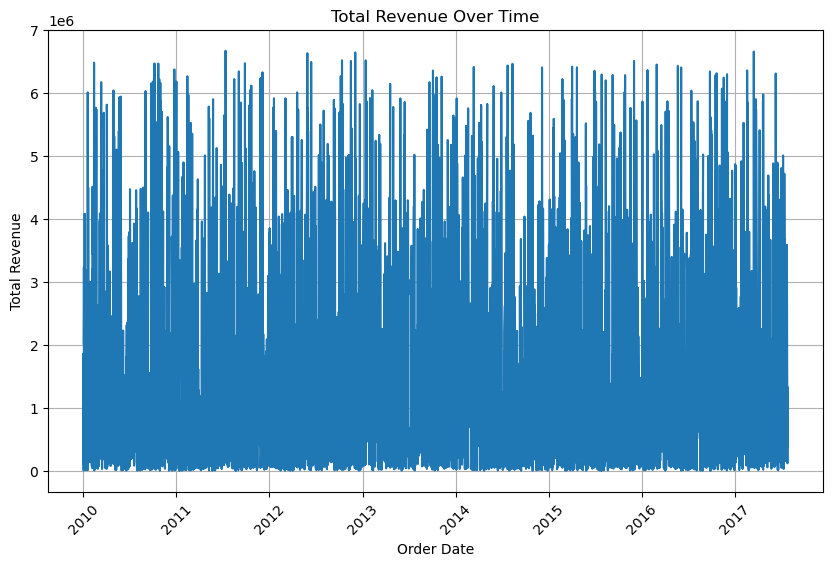

In [123]:
# Create the Line Plot
plt.figure(figsize=(10, 6))
plt.plot(sales_df['Order Date'], df['Total Revenue'])
plt.xlabel('Order Date')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Scatter Plot

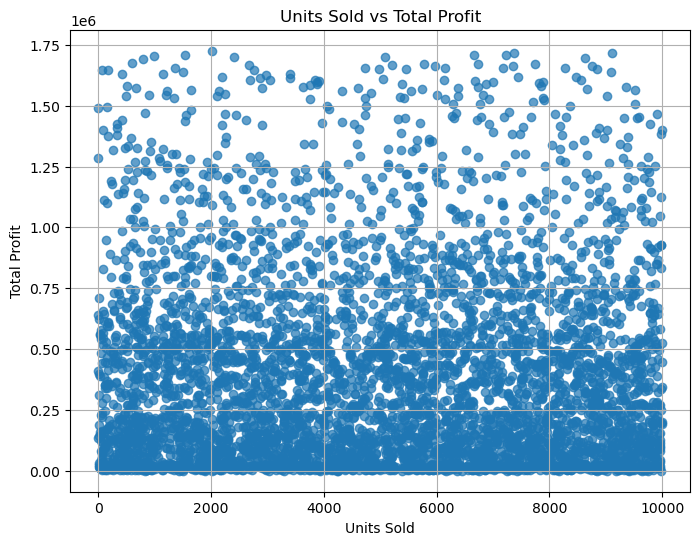

In [129]:
# Create the Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(sales_df['Units Sold'], df['Total Profit'], alpha=0.7)
plt.xlabel('Units Sold')
plt.ylabel('Total Profit')
plt.title('Units Sold vs Total Profit')
plt.grid(True)
plt.show()

#### Bar Plot

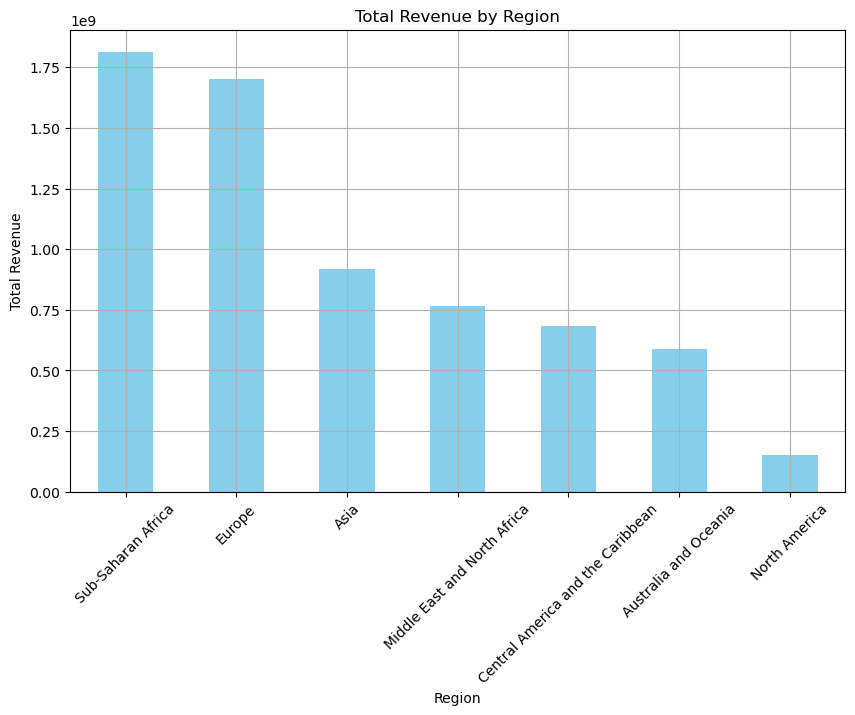

In [140]:
# Create the Bar Plot
plt.figure(figsize=(10, 6))
region_revenue = sales_df.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)
region_revenue.plot(kind='bar', color='skyblue')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Region')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Pie Chart

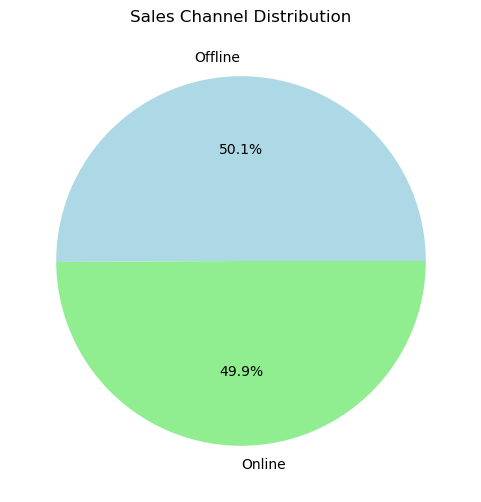

In [135]:
# Create the Pie Chart
plt.figure(figsize=(6, 6))
sales_channel_counts = sales_df['Sales Channel'].value_counts()
plt.pie(sales_channel_counts, labels=sales_channel_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Sales Channel Distribution')
plt.show()

#### Density Plot

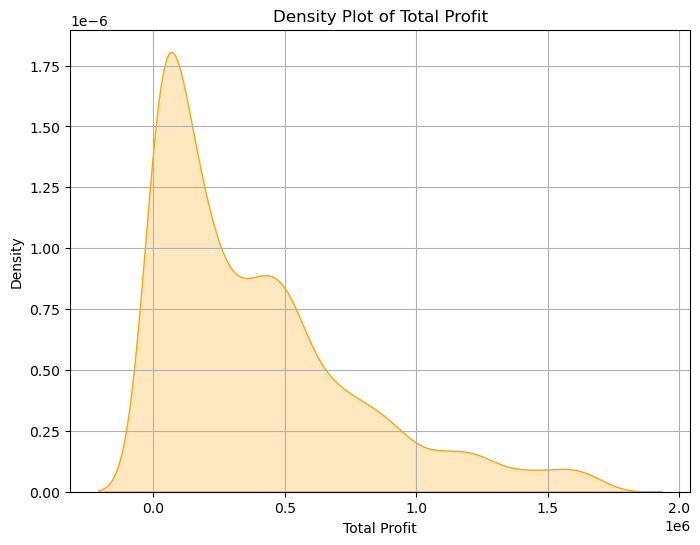

In [139]:
# Create the Density Plot
plt.figure(figsize=(8, 6))
sns.kdeplot(sales_df['Total Profit'], fill=True, color='orange')
plt.xlabel('Total Profit')
plt.ylabel('Density')
plt.title('Density Plot of Total Profit')
plt.grid(True)
plt.show()

#### Histogram

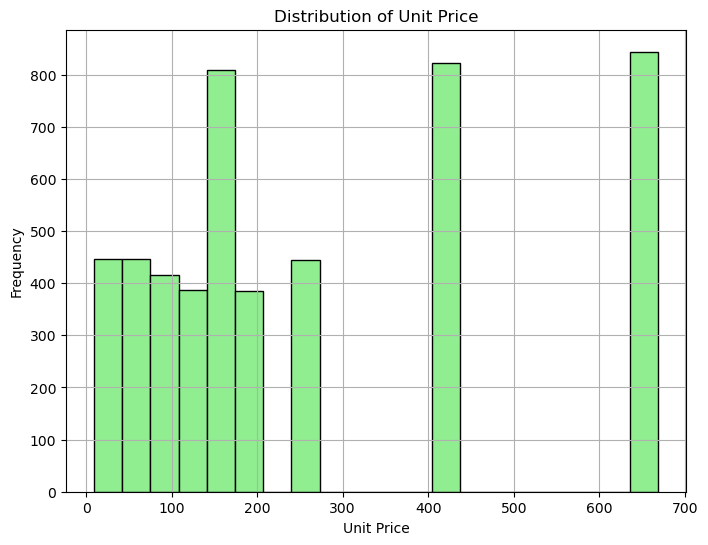

In [142]:
# Create the Histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Unit Price'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Distribution of Unit Price')
plt.grid(True)
plt.show()

The above code showcases various visualizations for a sales dataset stored in the 'sales_record.csv' file. 
The visualizations include:
- A line plot illustrating the trend of total revenue over time
- A scatter plot demonstrating the relationship between units sold and total profit
- A bar plot showcasing the total revenue for each region
- A pie chart displaying the distribution of sales channels in the dataset
- A density plot representing the density of total profit values
- A histogram visualizing the distribution of unit prices

These visualizations offer valuable insights into the dataset and aid in understanding key patterns and trends in the sales data.